In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Reading the Data

In [112]:
df = pd.read_csv(r'C:\Users\anamika\Downloads\Placement_Data_Full_Class.csv')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [114]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [115]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

## Exploratory Data Analysis (EDA)

<AxesSubplot:>

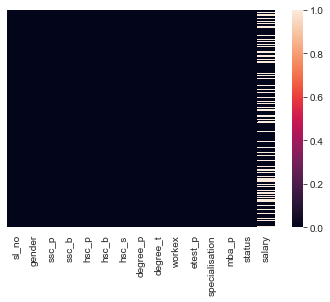

In [116]:
sns.heatmap(df.isnull(), yticklabels=False)

<AxesSubplot:xlabel='status', ylabel='count'>

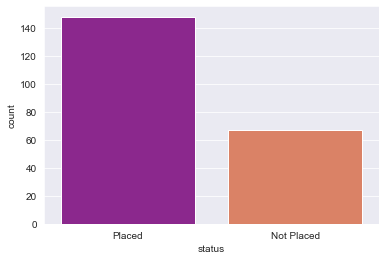

In [117]:
sns.set_style('darkgrid')
sns.countplot(x='status', data=df,  palette='plasma')

<AxesSubplot:xlabel='status', ylabel='count'>

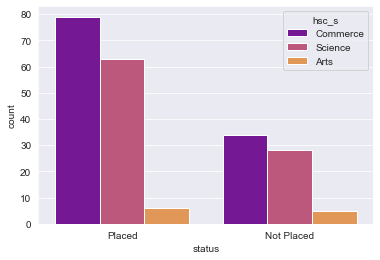

In [118]:
sns.countplot(x='status', data=df, hue='hsc_s', palette='plasma')

<AxesSubplot:xlabel='status', ylabel='count'>

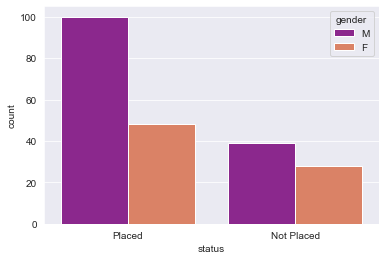

In [119]:
sns.countplot(x='status', data=df, hue='gender', palette='plasma')

<AxesSubplot:>

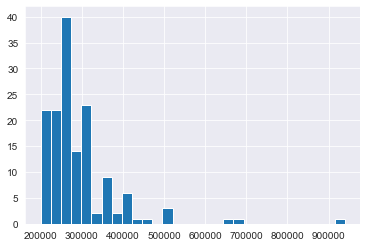

In [120]:
df['salary'].hist(bins=30)

## Data Cleaning

<AxesSubplot:>

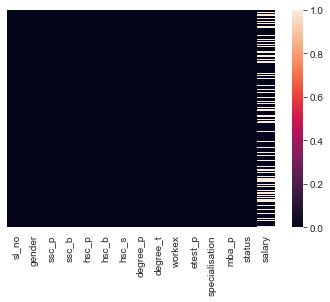

In [121]:
sns.heatmap(df.isnull(), yticklabels=False)

<AxesSubplot:xlabel='hsc_s', ylabel='salary'>

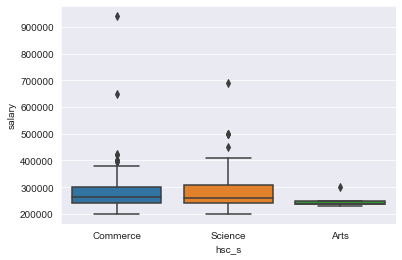

In [122]:
sns.boxplot(x='hsc_s', y='salary', data=df)

In [123]:
df['salary'].fillna(0,inplace=True)
df['salary'].isna().any()

False

In [124]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [125]:
def updateSalary(cols):
    salary = cols[0]
    hsc_s = cols[1]
    
    if (pd.isnull(salary)):
        if hsc_s == 'Commerce':
            return 280000
        elif hsc_s == 'Science':
            return 260000
        else:
            return 240000
        
    else:
        return salary

In [126]:
df['salary'] = df[['salary', 'hsc_s']].apply(updateSalary, axis = 1)

<AxesSubplot:>

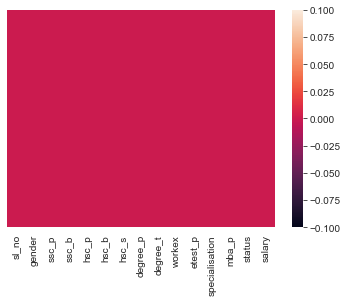

In [127]:
sns.heatmap(df.isnull(), yticklabels=False)

## Feature Engineering

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


#### Creating Dummy Variables

In [129]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [130]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [131]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [132]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [133]:
Gender = pd.get_dummies(df['gender'], drop_first=True)

In [134]:
Subject = pd.get_dummies(df['hsc_s'], drop_first=True)

In [135]:
Experience = pd.get_dummies(df['workex'], drop_first=True)

In [136]:
Status = pd.get_dummies(df['status'], drop_first=True)

In [137]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [138]:
df = df.drop(['workex','status','gender','sl_no'], axis=1)

In [139]:
df.head()

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary
0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,55.0,Mkt&HR,58.80,270000.0
1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,200000.0
2,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,250000.0
3,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,66.0,Mkt&HR,59.43,0.0
4,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,96.8,Mkt&Fin,55.50,425000.0


In [140]:
df.drop('ssc_b', axis=1, inplace=True)

In [141]:
df.drop('hsc_b', axis=1, inplace=True)

In [142]:
df.drop('hsc_s', axis=1, inplace=True)

In [143]:
df.drop('salary', axis=1, inplace=True)

In [144]:
df = pd.concat([df, Gender, Subject, Experience, Status], axis = 1)

In [145]:
df.head()

,ssc_p,hsc_p,degree_p,degree_t,etest_p,specialisation,mba_p,M,Commerce,Science,Yes,Placed
0,67.00,91.00,58.00,Sci&Tech,55.0,Mkt&HR,58.80,1,1,0,0,1
1,79.33,78.33,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,1,0,1,1,1
2,65.00,68.00,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,1,0,0,0,1
3,56.00,52.00,52.00,Sci&Tech,66.0,Mkt&HR,59.43,1,0,1,0,0
4,85.80,73.60,73.30,Comm&Mgmt,96.8,Mkt&Fin,55.50,1,1,0,0,1


In [146]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [147]:
df['specialisation']=df['specialisation'].map({'Mkt&Fin':1,'Mkt&HR':0})

In [148]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [149]:
df['degree_t']=df['degree_t'].map({'Comm&Mgmt':2,'Sci&Tech':1,'Others':0})

In [150]:
df.head()

,ssc_p,hsc_p,degree_p,degree_t,etest_p,specialisation,mba_p,M,Commerce,Science,Yes,Placed
0,67.00,91.00,58.00,1,55.0,0,58.80,1,1,0,0,1
1,79.33,78.33,77.48,1,86.5,1,66.28,1,0,1,1,1
2,65.00,68.00,64.00,2,75.0,1,57.80,1,0,0,0,1
3,56.00,52.00,52.00,1,66.0,0,59.43,1,0,1,0,0
4,85.80,73.60,73.30,2,96.8,1,55.50,1,1,0,0,1


<AxesSubplot:>

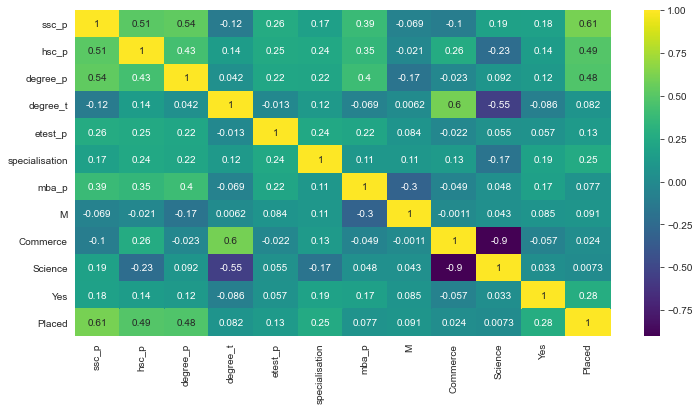

In [151]:
corr=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='viridis')

## Train Test Split

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X=df.drop('Placed',axis=1)
y=df['Placed'] 

In [154]:
df.head()

,ssc_p,hsc_p,degree_p,degree_t,etest_p,specialisation,mba_p,M,Commerce,Science,Yes,Placed
0,67.00,91.00,58.00,1,55.0,0,58.80,1,1,0,0,1
1,79.33,78.33,77.48,1,86.5,1,66.28,1,0,1,1,1
2,65.00,68.00,64.00,2,75.0,1,57.80,1,0,0,0,1
3,56.00,52.00,52.00,1,66.0,0,59.43,1,0,1,0,0
4,85.80,73.60,73.30,2,96.8,1,55.50,1,1,0,0,1


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
lg = LogisticRegression()

In [158]:
lg.fit(X_train, y_train)

C:\Users\anamika\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
lg.score(X_train,y_train)

0.8958333333333334

In [160]:
predictions = lg.predict(X_test)

In [161]:
predictions

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1], dtype=uint8)

## KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
from sklearn.model_selection import cross_val_score

In [164]:
ks = list(range(1, 50, 2))
ks

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [165]:
cvScores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
    cvScores.append([score])

In [166]:
cvScores

[[0.758008658008658],
 [0.8231601731601732],
 [0.8463203463203464],
 [0.8508658008658008],
 [0.8554112554112555],
 [0.8506493506493505],
 [0.8417748917748918],
 [0.8465367965367966],
 [0.8465367965367966],
 [0.8465367965367966],
 [0.8465367965367966],
 [0.8417748917748918],
 [0.8372294372294371],
 [0.8229437229437229],
 [0.8277056277056276],
 [0.8277056277056276],
 [0.8229437229437229],
 [0.8277056277056276],
 [0.8370129870129871],
 [0.8229437229437229],
 [0.8277056277056276],
 [0.8183982683982685],
 [0.8231601731601732],
 [0.8324675324675324],
 [0.827922077922078]]

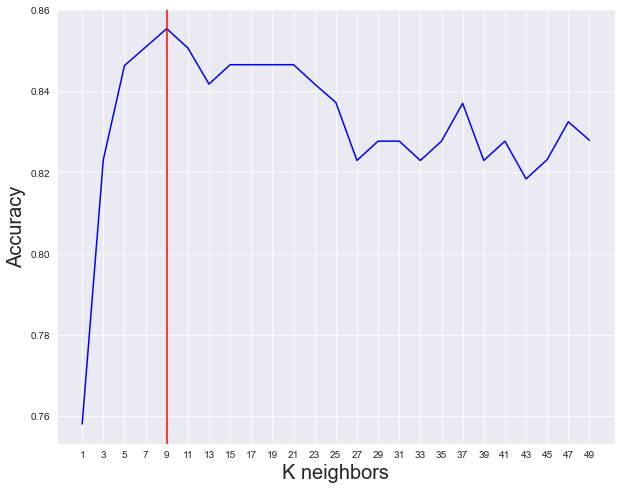

In [167]:
plt.figure(figsize=(10,8))
plt.plot(ks,cvScores,color='blue')
plt.xlabel('K neighbors',size=20)
plt.ylabel('Accuracy',size=20)
plt.xticks(np.arange(1,50, 2))
plt.axvline(9,color='red')

## Finalising the Algorithm

In [168]:
finalKnn = KNeighborsClassifier(n_neighbors=9)
finalKnn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

## Model Evaluation

In [169]:
from sklearn import metrics

In [170]:
metrics.confusion_matrix(y_test, predictions)

array([[16, 10],
       [ 0, 45]], dtype=int64)

In [171]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        26
           1       0.82      1.00      0.90        45

    accuracy                           0.86        71
   macro avg       0.91      0.81      0.83        71
weighted avg       0.88      0.86      0.85        71



## Saving the Model

In [172]:
import pickle

In [173]:
pickle.dump(lg, open("placement.pkl", "wb"))

## Testing the Model

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ssc_p           215 non-null    float64
 1   hsc_p           215 non-null    float64
 2   degree_p        215 non-null    float64
 3   degree_t        215 non-null    int64  
 4   etest_p         215 non-null    float64
 5   specialisation  215 non-null    int64  
 6   mba_p           215 non-null    float64
 7   M               215 non-null    uint8  
 8   Commerce        215 non-null    uint8  
 9   Science         215 non-null    uint8  
 10  Yes             215 non-null    uint8  
 11  Placed          215 non-null    uint8  
dtypes: float64(5), int64(2), uint8(5)
memory usage: 12.9 KB


In [176]:
df.head()

,ssc_p,hsc_p,degree_p,degree_t,etest_p,specialisation,mba_p,M,Commerce,Science,Yes,Placed
0,67.00,91.00,58.00,1,55.0,0,58.80,1,1,0,0,1
1,79.33,78.33,77.48,1,86.5,1,66.28,1,0,1,1,1
2,65.00,68.00,64.00,2,75.0,1,57.80,1,0,0,0,1
3,56.00,52.00,52.00,1,66.0,0,59.43,1,0,1,0,0
4,85.80,73.60,73.30,2,96.8,1,55.50,1,1,0,0,1


In [177]:
loadedModel = pickle.load(open("placement.pkl", "rb"))

In [178]:
loadedModel.predict([[23, 25, 51, 2, 70, 1, 87, 1, 0, 1, 0]])

array([0], dtype=uint8)

In [180]:
loadedModel.predict([[90, 85, 80, 0, 91, 0, 70, 0 , 1, 0, 1]])

array([1], dtype=uint8)